In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [66]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("sentiment shape:", sentiment.shape)
print("trades shape:", trades.shape)

sentiment shape: (2644, 4)
trades shape: (211224, 16)


In [67]:
sentiment.columns = sentiment.columns.str.strip()
trades.columns = trades.columns.str.strip()

print("Sentiment columns:", sentiment.columns.tolist())
print("Trades columns:", trades.columns.tolist())

Sentiment columns: ['timestamp', 'value', 'classification', 'date']
Trades columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [68]:
sentiment = sentiment.rename(columns={
    sentiment.columns[0]: "Date",
    sentiment.columns[1]: "Classification"
})

print(sentiment.head(3))

         Date  Classification classification        date
0  1517463000              30           Fear  2018-02-01
1  1517549400              15   Extreme Fear  2018-02-02
2  1517635800              40           Fear  2018-02-03


In [69]:
# parse date safely (try normal parse first)
sentiment["Date_dt"] = pd.to_datetime(sentiment["Date"], errors="coerce")

print("Sentiment date parse NaN rate:", sentiment["Date_dt"].isna().mean())
print("Sentiment date sample:", sentiment["Date"].head(5).tolist())
print("Sentiment parsed sample:", sentiment["Date_dt"].head(5).tolist())

Sentiment date parse NaN rate: 0.0
Sentiment date sample: [1517463000, 1517549400, 1517635800, 1517722200, 1517808600]
Sentiment parsed sample: [Timestamp('1970-01-01 00:00:01.517463'), Timestamp('1970-01-01 00:00:01.517549400'), Timestamp('1970-01-01 00:00:01.517635800'), Timestamp('1970-01-01 00:00:01.517722200'), Timestamp('1970-01-01 00:00:01.517808600')]


In [70]:
sentiment["Date_dt"] = pd.to_datetime(sentiment["Date"], errors="coerce", dayfirst=True)

print("Sentiment date parse NaN rate (dayfirst):", sentiment["Date_dt"].isna().mean())
print("Sentiment parsed sample:", sentiment["Date_dt"].head(5).tolist())

Sentiment date parse NaN rate (dayfirst): 0.0
Sentiment parsed sample: [Timestamp('1970-01-01 00:00:01.517463'), Timestamp('1970-01-01 00:00:01.517549400'), Timestamp('1970-01-01 00:00:01.517635800'), Timestamp('1970-01-01 00:00:01.517722200'), Timestamp('1970-01-01 00:00:01.517808600')]


In [71]:
sentiment["Date_key"] = sentiment["Date_dt"].dt.date

print("Sentiment range:", sentiment["Date_key"].min(), "to", sentiment["Date_key"].max())
print(sentiment[["Date", "Date_key", "Classification"]].head(3))

Sentiment range: 1970-01-01 to 1970-01-01
         Date    Date_key  Classification
0  1517463000  1970-01-01              30
1  1517549400  1970-01-01              15
2  1517635800  1970-01-01              40


In [74]:
# Use unix milliseconds timestamp (clean + reliable)
trades["timestamp"] = pd.to_datetime(trades["Timestamp"], unit="ms", errors="coerce")

# create date key
trades["Date_key"] = trades["timestamp"].dt.date

print("Timestamp NaT rate:", trades["timestamp"].isna().mean())

valid_dates = trades["Date_key"].dropna()
print("Trades range:", valid_dates.min(), "to", valid_dates.max())

print(trades[["Timestamp", "timestamp", "Date_key"]].head(10))

Timestamp NaT rate: 0.0
Trades range: 2023-03-28 to 2025-06-15
      Timestamp           timestamp    Date_key
0  1.730000e+12 2024-10-27 03:33:20  2024-10-27
1  1.730000e+12 2024-10-27 03:33:20  2024-10-27
2  1.730000e+12 2024-10-27 03:33:20  2024-10-27
3  1.730000e+12 2024-10-27 03:33:20  2024-10-27
4  1.730000e+12 2024-10-27 03:33:20  2024-10-27
5  1.730000e+12 2024-10-27 03:33:20  2024-10-27
6  1.730000e+12 2024-10-27 03:33:20  2024-10-27
7  1.730000e+12 2024-10-27 03:33:20  2024-10-27
8  1.730000e+12 2024-10-27 03:33:20  2024-10-27
9  1.730000e+12 2024-10-27 03:33:20  2024-10-27


In [75]:
trade_dates = set(trades["Date_key"].dropna())
sent_dates = set(sentiment["Date_key"].dropna())

common = trade_dates.intersection(sent_dates)

print("Common dates count:", len(common))
print("Example common dates:", list(common)[:10])

Common dates count: 0
Example common dates: []


In [76]:
data = trades.merge(
    sentiment[["Date_key","Classification"]],
    on="Date_key",
    how="left"
)

print("Classification NaN rate:", data["Classification"].isna().mean())
print(data["Classification"].value_counts(dropna=False).head())

Classification NaN rate: 1.0
Classification
NaN    211224
Name: count, dtype: int64


In [77]:
print(sentiment.head(10))
print("Columns:", sentiment.columns.tolist())

print("\nDate raw sample:", sentiment["Date"].head(10).tolist())
print("Parsed NaT rate:", sentiment["Date_dt"].isna().mean())
print("Date_key NaN rate:", sentiment["Date_key"].isna().mean())

print("\nSentiment Date_key range:", sentiment["Date_key"].dropna().min(), "to", sentiment["Date_key"].dropna().max())
print("Sentiment Date_key sample:", sentiment["Date_key"].dropna().astype(str).head(10).tolist())

         Date  Classification classification        date  \
0  1517463000              30           Fear  2018-02-01   
1  1517549400              15   Extreme Fear  2018-02-02   
2  1517635800              40           Fear  2018-02-03   
3  1517722200              24   Extreme Fear  2018-02-04   
4  1517808600              11   Extreme Fear  2018-02-05   
5  1517895000               8   Extreme Fear  2018-02-06   
6  1517981400              36           Fear  2018-02-07   
7  1518067800              30           Fear  2018-02-08   
8  1518154200              44           Fear  2018-02-09   
9  1518240600              54        Neutral  2018-02-10   

                        Date_dt    Date_key  
0 1970-01-01 00:00:01.517463000  1970-01-01  
1 1970-01-01 00:00:01.517549400  1970-01-01  
2 1970-01-01 00:00:01.517635800  1970-01-01  
3 1970-01-01 00:00:01.517722200  1970-01-01  
4 1970-01-01 00:00:01.517808600  1970-01-01  
5 1970-01-01 00:00:01.517895000  1970-01-01  
6 1970-01-01 00:0

In [78]:
s = sentiment["Date"].astype(str).str.strip()

# try normal parse
dt1 = pd.to_datetime(s, errors="coerce")

# try dayfirst
dt2 = pd.to_datetime(s, errors="coerce", dayfirst=True)

# try unix seconds
dt3 = pd.to_datetime(pd.to_numeric(s, errors="coerce"), errors="coerce", unit="s")

# try unix milliseconds
dt4 = pd.to_datetime(pd.to_numeric(s, errors="coerce"), errors="coerce", unit="ms")

# choose the parse with the most non-null values
candidates = {"normal": dt1, "dayfirst": dt2, "unix_s": dt3, "unix_ms": dt4}
best = max(candidates, key=lambda k: candidates[k].notna().mean())

sentiment["Date_dt"] = candidates[best]
sentiment["Date_key"] = sentiment["Date_dt"].dt.date

print("Best parser:", best)
print("Parsed non-null rate:", sentiment["Date_dt"].notna().mean())
print("Sentiment range:", sentiment["Date_key"].dropna().min(), "to", sentiment["Date_key"].dropna().max())
print(sentiment[["Date", "Date_dt", "Date_key", "Classification"]].head(10))

/tmp/ipython-input-1832384337.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt1 = pd.to_datetime(s, errors="coerce")
/tmp/ipython-input-1832384337.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s, errors="coerce", dayfirst=True)


Best parser: unix_s
Parsed non-null rate: 1.0
Sentiment range: 2018-02-01 to 2025-05-02
         Date             Date_dt    Date_key  Classification
0  1517463000 2018-02-01 05:30:00  2018-02-01              30
1  1517549400 2018-02-02 05:30:00  2018-02-02              15
2  1517635800 2018-02-03 05:30:00  2018-02-03              40
3  1517722200 2018-02-04 05:30:00  2018-02-04              24
4  1517808600 2018-02-05 05:30:00  2018-02-05              11
5  1517895000 2018-02-06 05:30:00  2018-02-06               8
6  1517981400 2018-02-07 05:30:00  2018-02-07              36
7  1518067800 2018-02-08 05:30:00  2018-02-08              30
8  1518154200 2018-02-09 05:30:00  2018-02-09              44
9  1518240600 2018-02-10 05:30:00  2018-02-10              54


In [79]:
trade_dates = set(trades["Date_key"].dropna())
sent_dates  = set(sentiment["Date_key"].dropna())
common = trade_dates.intersection(sent_dates)

print("Common dates count:", len(common))
print("Example common dates:", list(common)[:10])

Common dates count: 6
Example common dates: [datetime.date(2024, 10, 27), datetime.date(2023, 11, 14), datetime.date(2023, 3, 28), datetime.date(2024, 7, 3), datetime.date(2025, 2, 19), datetime.date(2024, 3, 9)]


In [80]:
# Merge using the date key
data = trades.merge(
    sentiment[["Date_key", "Classification"]],
    on="Date_key",
    how="left"
)

# clean column names
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

print("Classification NaN rate:", data["classification"].isna().mean())
print(data["classification"].value_counts(dropna=False).head())

Classification NaN rate: 0.12764174525622088
classification
44.0    133871
74.0     35241
NaN      26961
50.0      7141
84.0      6962
Name: count, dtype: int64


In [81]:
print(data[["date_key","classification","closed_pnl"]].head(10))

     date_key  classification  closed_pnl
0  2024-10-27            74.0         0.0
1  2024-10-27            74.0         0.0
2  2024-10-27            74.0         0.0
3  2024-10-27            74.0         0.0
4  2024-10-27            74.0         0.0
5  2024-10-27            74.0         0.0
6  2024-10-27            74.0         0.0
7  2024-10-27            74.0         0.0
8  2024-10-27            74.0         0.0
9  2024-10-27            74.0         0.0


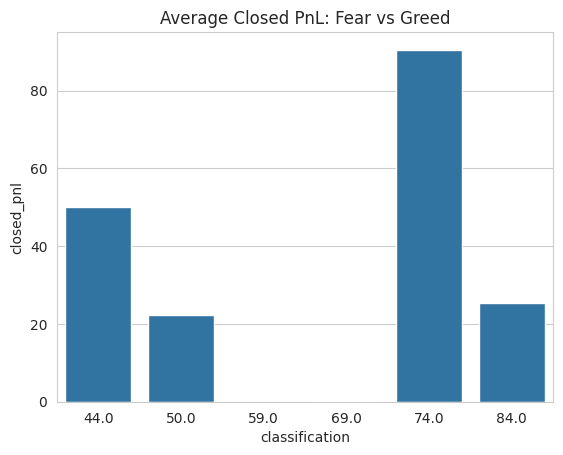

   classification  closed_pnl
0            44.0   50.047622
1            50.0   22.229713
2            59.0    0.000000
3            69.0    0.148807
4            74.0   90.504272
5            84.0   25.418772


In [82]:
df = data.dropna(subset=["classification"])

perf = df.groupby("classification")["closed_pnl"].mean().reset_index()

sns.barplot(data=perf, x="classification", y="closed_pnl")
plt.title("Average Closed PnL: Fear vs Greed")
plt.show()

print(perf)

In [83]:
print(perf)

   classification  closed_pnl
0            44.0   50.047622
1            50.0   22.229713
2            59.0    0.000000
3            69.0    0.148807
4            74.0   90.504272
5            84.0   25.418772


In [84]:
# Rename properly
sentiment = sentiment.rename(columns={"Classification":"fear_greed_index"})

# Convert index to numeric
sentiment["fear_greed_index"] = pd.to_numeric(
    sentiment["fear_greed_index"], errors="coerce"
)

# Create sentiment labels
sentiment["classification"] = np.where(
    sentiment["fear_greed_index"] < 50,
    "Fear",
    "Greed"
)

In [85]:
data = trades.merge(
    sentiment[["Date_key","classification","fear_greed_index"]],
    on="Date_key",
    how="left"
)

data.columns = data.columns.str.lower().str.replace(" ","_")

print(data["classification"].value_counts(dropna=False))

classification
Fear     133871
Greed     50392
NaN       26961
Name: count, dtype: int64


  classification  closed_pnl
0           Fear   50.047622
1          Greed   69.958017


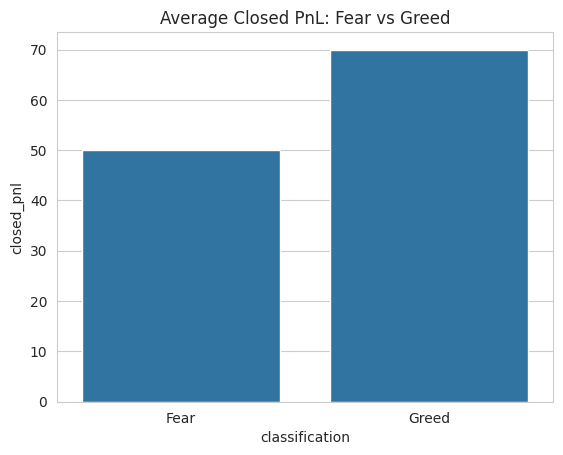

In [86]:
df = data.dropna(subset=["classification"])

perf = df.groupby("classification")["closed_pnl"].mean().reset_index()

print(perf)

sns.barplot(data=perf, x="classification", y="closed_pnl")
plt.title("Average Closed PnL: Fear vs Greed")
plt.show()

In [88]:
print (perf)

  classification  closed_pnl
0           Fear   50.047622
1          Greed   69.958017


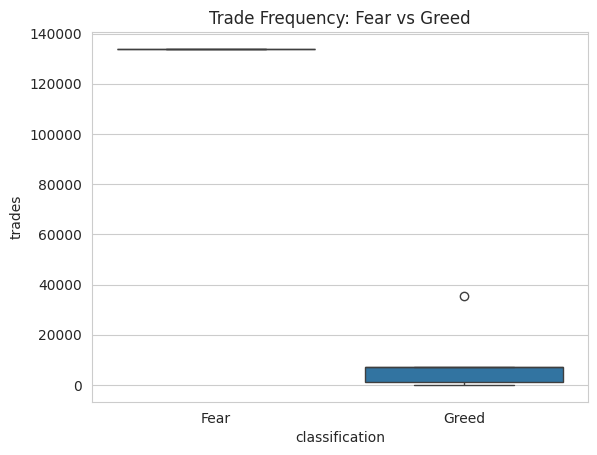

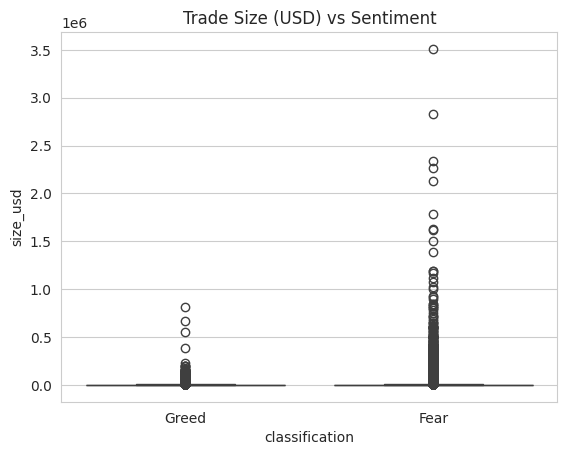

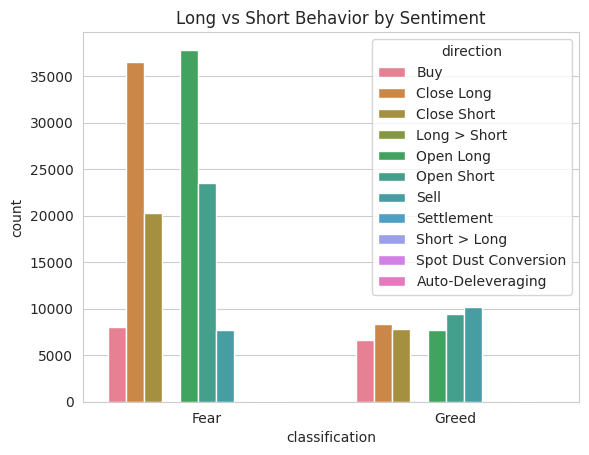

In [89]:
#Trade frequency
freq = data.groupby(['classification','date_key']).size().reset_index(name='trades')

sns.boxplot(data=freq, x='classification', y='trades')
plt.title("Trade Frequency: Fear vs Greed")
plt.show()

#position size
sns.boxplot(data=data, x='classification', y='size_usd')
plt.title("Trade Size (USD) vs Sentiment")
plt.show()

#Long/short bias
dir_counts = data.groupby(['classification','direction']).size().reset_index(name='count')

sns.barplot(data=dir_counts, x='classification', y='count', hue='direction')
plt.title("Long vs Short Behavior by Sentiment")
plt.show()

#Leverage distribution
if 'leverage' in data.columns:
    sns.boxplot(data=data, x='classification', y='leverage')
    plt.title("Leverage vs Sentiment")
    plt.show()

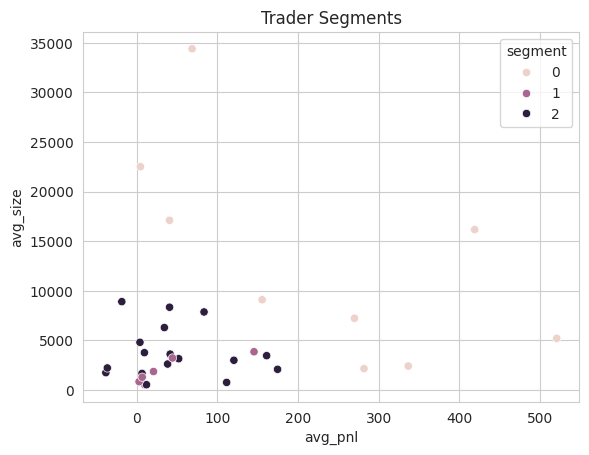

In [90]:
# basic trader metrics
metrics = data.groupby('account').agg({
    'closed_pnl':'mean',
    'size_usd':'mean',
    'trade_id':'count'
}).reset_index()

metrics.columns = ['account','avg_pnl','avg_size','trade_count']

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = StandardScaler().fit_transform(metrics[['avg_pnl','avg_size','trade_count']])

kmeans = KMeans(n_clusters=3, random_state=42)
metrics['segment'] = kmeans.fit_predict(X)

sns.scatterplot(data=metrics, x='avg_pnl', y='avg_size', hue='segment')
plt.title("Trader Segments")
plt.show()